In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import numpy as np
import PIL
import pandas as pd
%load_ext autoreload 
%autoreload 2
%config Completer.use_jedi = False

In [3]:
fp = Path('/Users/alexnaka/Pictures/shababo')

In [65]:
files = sorted(list(fp.glob('*.png')))

In [85]:
file_infos = []
for file in files:
    stems = file.stem.split('.')
    
    base_num = int(stems[0])
    try:
        iter_num = int(stems[1])
    except:
        iter_num = 0
    
    file_info = {
        'filepath': file,
        'base_num': base_num,
        'iter_num': iter_num,
    }
    file_infos.append(file_info)
    
file_infos = pd.DataFrame(file_infos)

In [91]:
maxes = file_infos.groupby('base_num').max().reset_index()
maxes = maxes.rename(columns={'iter_num': 'max_iter_num'}).drop(columns=['filepath'])
file_infos = file_infos.merge(maxes, on=['base_num'], how='left')

In [107]:
is_max_iter = file_infos['iter_num'] == file_infos['max_iter_num']
files_to_include = file_infos.loc[is_max_iter, 'filepath'].values

In [96]:
n_rows = 11
n_cols = 7

n_plots = n_rows * n_cols
fig_width = 8.5
fig_height = 11

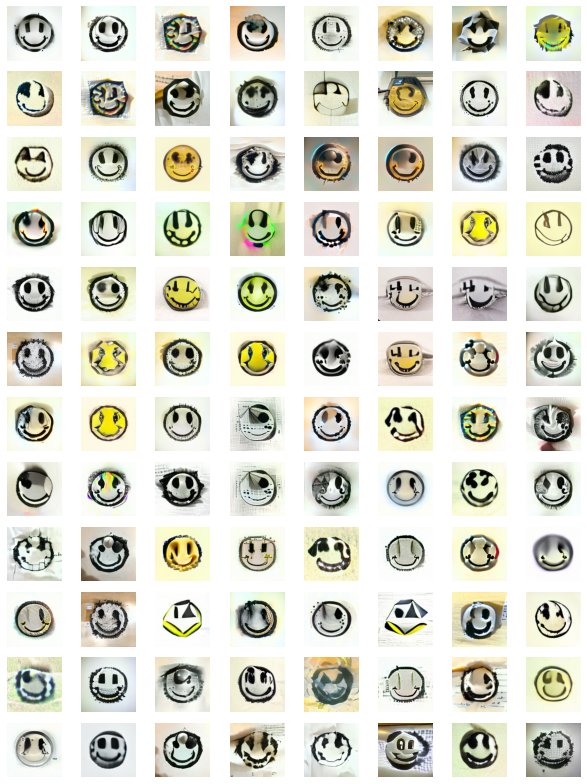

In [58]:
f, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axs = axs.ravel()

for ii in range(n_plots):
    im = Image.open(files[ii])
    ax = axs[ii]
    ax.imshow(im)
    ax.axis('off')
    
plt.tight_layout()

In [108]:

ims = []
for ii in range(n_plots):
    im = Image.open(files_to_include[ii]).resize((128, 128)).convert('L')
    ims.append(im)

In [109]:
row_arrays = []
for ii in range(n_plots):
    array = np.array(ims[ii])
    if (ii % n_cols) == 0:
        row_array = array.copy()
    else:
        row_array = np.concatenate([row_array, array.copy()], axis=1)
    
    if (ii % n_cols) == (n_cols - 1):
        row_arrays.append(row_array.copy())

In [111]:
agg_im = Image.fromarray(np.concatenate(row_arrays))

In [112]:
agg_im.save(fp.joinpath('agg_im.png'))

# new format

In [113]:
pixels_per_block_x = 128
pixels_per_block_y = 128


In [123]:
n_rows = 11
n_cols = 7

n_plots = n_rows * n_cols
fig_width = 8.5
fig_height = 11
n_pixels_y = (n_rows + 1) * pixels_per_block_y
n_pixels_x = (n_cols + 1) * pixels_per_block_x

In [119]:
block_infos = {iy:{ix:{} for ix in range(n_cols)} for iy in range(n_rows)}

In [121]:

for iy in range(n_rows):
    for ix in range(n_cols):
        block_info = {
            'ix_start': pixels_per_block_x * ix,
            'ix_end': pixels_per_block_x * (ix + 1),
            'iy_start': pixels_per_block_y * iy,
            'iy_end': pixels_per_block_y * (iy + 1),
            'filled': False
        }
        block_infos[iy][ix] = block_info

In [124]:
mosaic = np.zeros((n_pixels_y, n_pixels_x))

In [4]:
mg.files

[PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/001.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/002.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/003.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/004.1.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/004.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/005.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/006.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/007.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/008.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/010.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/011.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/012.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/013.png'),
 PosixPath('/Users/alexnaka/Pictures/shababo/vqgan_smileys/014.png'),
 PosixPath('/Users